# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

In [2]:
library(nnet)
library(MASS)

### Datos 1

In [3]:
datos1 <- read.table('data/datos1.txt', header = TRUE)
datos1$G <- as.factor(datos1$G)

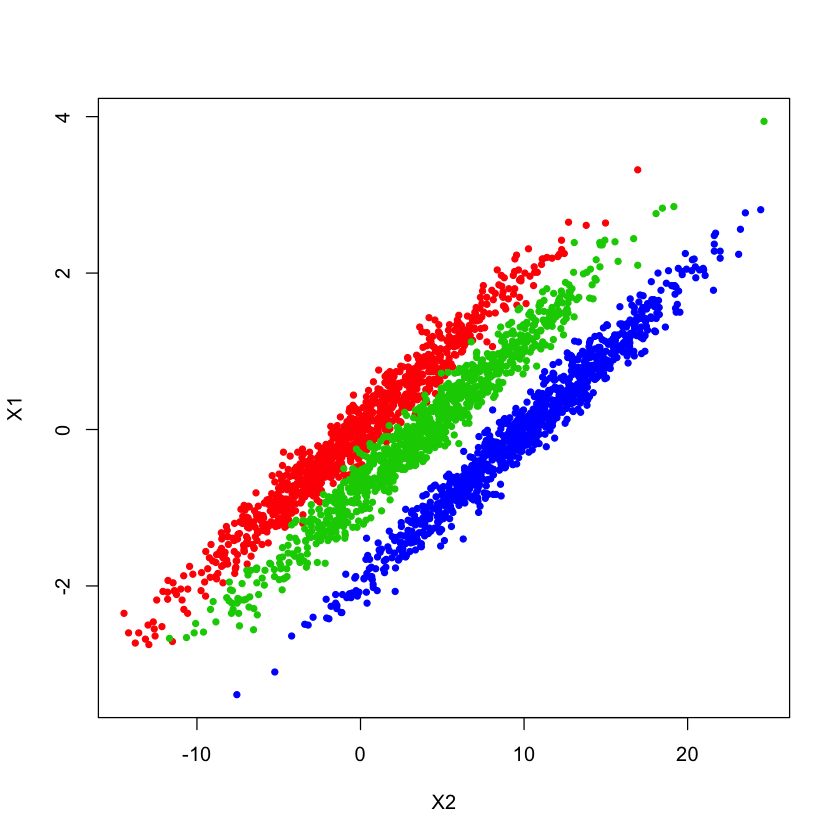

In [4]:
plot(X1 ~ X2, col = as.numeric(G) + 1, data = datos1, pch=20)

In [5]:
(fit.datos1 <- polr(G ~ X1 + X2, data=datos1, Hess = TRUE))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = G ~ X1 + X2, data = datos1, Hess = TRUE)

Coefficients:
        X1         X2 
-22.009687   4.396455 

Intercepts:
      1|2       2|3 
 8.583307 30.753973 

Residual Deviance: 249.2769 
AIC: 257.2769 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [6]:
confint.default(fit.datos1)

,2.5 %,97.5 %
X1,-25.189867,-18.829508
X2,3.764435,5.028476


##### Verosimilitud Perfil

In [7]:
confint(fit.datos1)

Waiting for profiling to be done...


,2.5 %,97.5 %
X1,-25.49271,-19.102582
X2,3.81908,5.089052


#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

#### Predicciones

#### Otros Modelos

### Datos 2

In [8]:
datos2 <- read.table('data/datos2.txt', header = TRUE)
datos2$Y <- as.factor(datos2$Y)

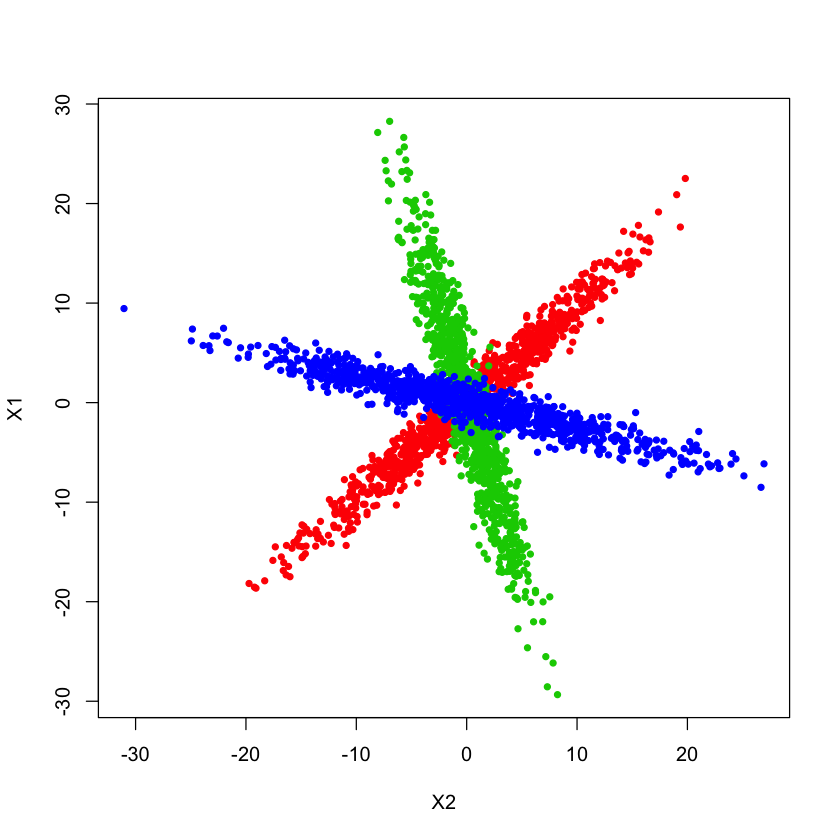

In [9]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos2, pch = 20)

In [10]:
(fit.datos2 <- multinom(Y ~ X1 + X2, data=datos2, hessian = TRUE))

# weights:  12 (6 variable)
initial  value 3295.836866 
final  value 3295.229689 
converged


Call:
multinom(formula = Y ~ X1 + X2, data = datos2, hessian = TRUE)

Coefficients:
    (Intercept)           X1           X2
2 -3.443332e-05 -0.003254659 0.0009150342
3 -1.012462e-03 -0.003562986 0.0054936263

Residual Deviance: 6590.459 
AIC: 6602.459 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [11]:
confint.default(fit.datos2)

2.5 %,97.5 %


##### Verosimilitud Perfil

In [12]:
confint(fit.datos2)

, , 2

                  2.5 %      97.5 %
(Intercept) -0.08769813 0.087629262
X1          -0.01577695 0.009267632
X2          -0.01167613 0.013506198

, , 3

                   2.5 %      97.5 %
(Intercept) -0.088718962 0.086694039
X1          -0.016087820 0.008961848
X2          -0.007094758 0.018082011

#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

#### Predicciones

#### Otros Modelos

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [13]:
n <- 5000
k <- 4

In [14]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1272 1259 1199 1270

In [15]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    ranges <- seq(min, max, length = k + 1)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], ranges[i] - 3, ranges[i + 1] + 3))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    df$Y <- as.factor(df$Y)
    return(df)
}

In [16]:
ordinal.data <- GenerateSample(n.sampled, -50, 50)

In [17]:
ordinal.data <- cbind(ordinal.data, model.matrix( ~ 0 + Y, ordinal.data))

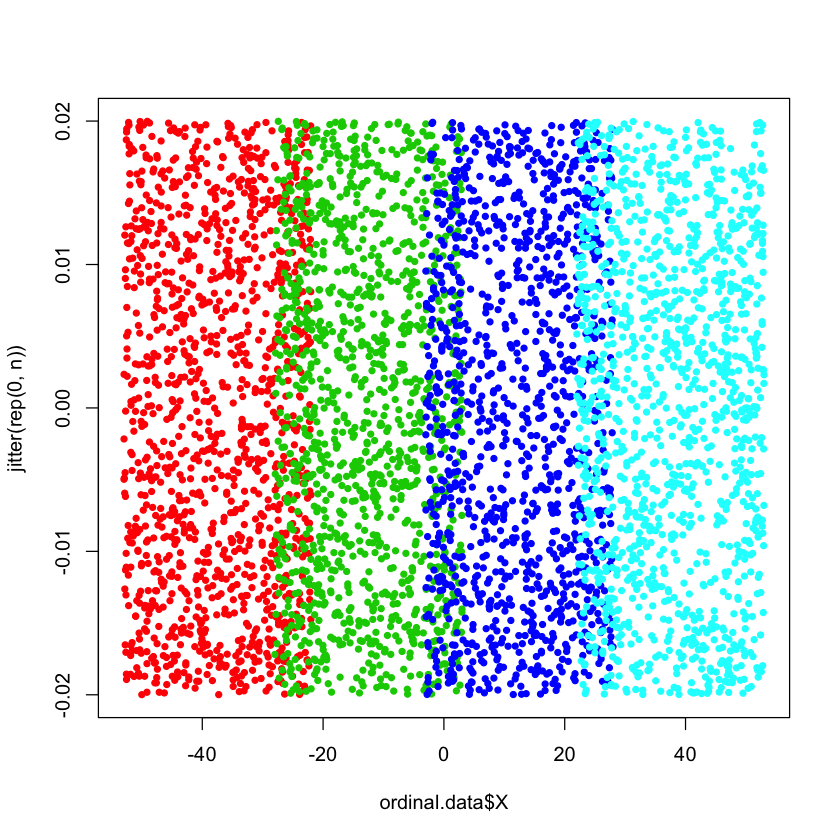

In [18]:
plot(ordinal.data$X, jitter(rep(0,n)), col=as.numeric(ordinal.data$Y) + 1, pch=20)

In [19]:
(m <- multinom(Y ~ 1 + X, data=ordinal.data))

# weights:  12 (6 variable)
initial  value 6931.471806 
iter  10 value 2075.972423
iter  20 value 1238.960170
final  value 1231.431718 
converged


Call:
multinom(formula = Y ~ 1 + X, data = ordinal.data)

Coefficients:
  (Intercept)         X
2  12.9839082 0.5228212
3  13.0334413 1.0115641
4   0.5939006 1.5171952

Residual Deviance: 2462.863 
AIC: 2474.863 

In [20]:
a <- c(coef(m)[, 2], mean(coef(m)[, 1]))

In [21]:
polr(Y ~ X, data=ordinal.data, Hess = TRUE)

Call:
polr(formula = Y ~ X, data = ordinal.data, Hess = TRUE)

Coefficients:
       X 
0.505719 

Intercepts:
         1|2          2|3          3|4 
-12.56058704  -0.05014124  12.44173943 

Residual Deviance: 2463.56 
AIC: 2471.56 